<a href="https://colab.research.google.com/github/Varshith-CS/CSCI-158/blob/main/CSCI_158_Assignment_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Assignment 2: Face Detection and Recognition using CNNs**

**Steps I followed:**

1. **Loaded and Organized the Dataset:**

    I downloaded the face recognition dataset from Kaggle on my computer, and then uploaded it to my Google Drive. In Colab, I mounted my Drive and pointed the code to the folder that contains all the face images (31 people, each in their own folder).

2. **Prepared the Data for Training:**

    I used Keras’ ImageDataGenerator to load the images.
    I also added some data augmentation (rotation, zoom, flips, etc.) to help the model generalize better since the dataset is kind of small.
    I split the dataset 80/20 automatically using the validation_split option.

3. **Built a CNN Model**

    I created a simple CNN with 4 convolution blocks.

    Each block had:

    •	a Conv2D layer

    •	a MaxPooling layer

    At the end, instead of flattening (which made the model too big), I used GlobalAveragePooling2D, then added a fully-connected layer and finally the output layer with 31 neurons (one for each person). I compiled the model using Adam optimizer and categorical cross-entropy.


4. **Trained the Model**

    I trained the CNN for 20 epochs using the training generator and checked its performance on the validation set at each epoch.
    The model started with low accuracy, but both train and validation accuracy slowly increased, which means the model actually learned something and didn’t overfit too much.

5. **Generated Predictions**

    After training, I used the model to predict labels for all the validation images. I collected both the true labels and the predicted labels so I could calculate the evaluation metrics.

6. **Calculated Performance Metrics**

    Using sklearn.metrics, I computed:

    •	accuracy

    •	precision (macro)

    •	recall (macro)

    •	F1-score (macro)

    I also created the confusion matrix to see which identities were being mixed up by the model.

7. **Analyzed Biometric Security Implications**

    I discussed how the CNN would perform if used in a real authentication system.Because the accuracy and F1-score were low, the system would likely have both:

    •	False Accepts (imposters getting authorized)

    •	False Rejects (real users being denied)

    So< even though the model works to some extent, it’s not reliable enough for actual biometric security.






In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [5]:
!ls "/content/drive/MyDrive/Assign2158"


 Dataset.csv   Faces  'Original Images'


In [6]:
!ls "/content/drive/MyDrive/Assign2158/Original Images"


'Original Images'


In [7]:
!ls "/content/drive/MyDrive/Assign2158/Faces"


Faces


In [8]:
!ls "/content/drive/MyDrive/Assign2158/Original Images/Original Images"


'Akshay Kumar'	      'Camila Cabello'	 'Hrithik Roshan'   'Priyanka Chopra'
'Alexandra Daddario'  'Charlize Theron'  'Hugh Jackman'     'Robert Downey Jr'
'Alia Bhatt'	      'Claire Holt'	 'Jessica Alba'     'Roger Federer'
'Amitabh Bachchan'    'Courtney Cox'	  Kashyap	    'Tom Cruise'
'Andy Samberg'	      'Dwayne Johnson'	 'Lisa Kudrow'	    'Vijay Deverakonda'
'Anushka Sharma'      'Elizabeth Olsen'  'Margot Robbie'    'Virat Kohli'
'Billie Eilish'       'Ellen Degeneres'   Marmik	    'Zac Efron'
'Brad Pitt'	      'Henry Cavill'	 'Natalie Portman'


In [9]:
data_dir = "/content/drive/MyDrive/Assign2158/Original Images/Original Images"


In [10]:
!ls "$data_dir" | head


Akshay Kumar
Alexandra Daddario
Alia Bhatt
Amitabh Bachchan
Andy Samberg
Anushka Sharma
Billie Eilish
Brad Pitt
Camila Cabello
Charlize Theron


In [14]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

img_size = (128, 128)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2,
    rotation_range=15,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1,
    horizontal_flip=True
)

val_datagen = ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

train_gen = train_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training',
    shuffle=True
)

val_gen = val_datagen.flow_from_directory(
    data_dir,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation',
    shuffle=False
)


Found 2071 images belonging to 31 classes.
Found 504 images belonging to 31 classes.


In [15]:
from tensorflow.keras import layers, models

model = models.Sequential([
    layers.Input(shape=(img_size[0], img_size[1], 3)),

    layers.Conv2D(32, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(64, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(128, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.Conv2D(256, (3,3), activation='relu', padding='same'),
    layers.MaxPooling2D((2,2)),

    layers.GlobalAveragePooling2D(),       # <-- instead of Flatten
    layers.Dense(256, activation='relu'),
    layers.Dropout(0.5),
    layers.Dense(train_gen.num_classes, activation='softmax')
])

model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 128, 128, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 64, 64, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_6 (Conv2D)               │ (None, 32, 32, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_6 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_7 (Conv2D)               │ (None, 16, 16, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_7 (MaxPooling2D)  │ (None, 8, 8, 256)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 256)            │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 256)            │        65,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 31)             │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 462,175 (1.76 MB)

 Trainable params: 462,175 (1.76 MB)

 Non-trainable params: 0 (0.00 B)

In [16]:
epochs = 20  # You can use 10–20 depending on your GPU time

history = model.fit(
    train_gen,
    epochs=epochs,
    validation_data=val_gen
)


Epoch 1/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 63s 885ms/step - accuracy: 0.0367 - loss: 3.4227 - val_accuracy: 0.0516 - val_loss: 3.4070
Epoch 2/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 54s 831ms/step - accuracy: 0.0453 - loss: 3.4093 - val_accuracy: 0.0536 - val_loss: 3.3761
Epoch 3/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 54s 836ms/step - accuracy: 0.0526 - loss: 3.3936 - val_accuracy: 0.0655 - val_loss: 3.3633
Epoch 4/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 849ms/step - accuracy: 0.0573 - loss: 3.3738 - val_accuracy: 0.0635 - val_loss: 3.3453
Epoch 5/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 844ms/step - accuracy: 0.0611 - loss: 3.3620 - val_accuracy: 0.0774 - val_loss: 3.3351
Epoch 6/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 836ms/step - accuracy: 0.0643 - loss: 3.3426 - val_accuracy: 0.0813 - val_loss: 3.3135
Epoch 7/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 838ms/step - accuracy: 0.0657 - loss: 3.3245 - val_accuracy: 0.0833 - val_loss: 3.2744
Epoch 8/20
65/65 ━━━━━━━━━━━━━━━━━━━━ 55s 850ms/step - accuracy: 0.0703 - loss: 3.2754 - val_accu

In [17]:
import numpy as np

val_gen.reset()
y_true = val_gen.classes
y_prob = model.predict(val_gen)
y_pred = np.argmax(y_prob, axis=1)


16/16 ━━━━━━━━━━━━━━━━━━━━ 11s 651ms/step


In [18]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score

cm = confusion_matrix(y_true, y_pred)

print("Accuracy:", accuracy_score(y_true, y_pred))
print("Precision (macro):", precision_score(y_true, y_pred, average='macro'))
print("Recall (macro):", recall_score(y_true, y_pred, average='macro'))
print("F1 (macro):", f1_score(y_true, y_pred, average='macro'))


Accuracy: 0.19246031746031747
Precision (macro): 0.18162319222689352
Recall (macro): 0.17709043476556577
F1 (macro): 0.13779357063822884


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


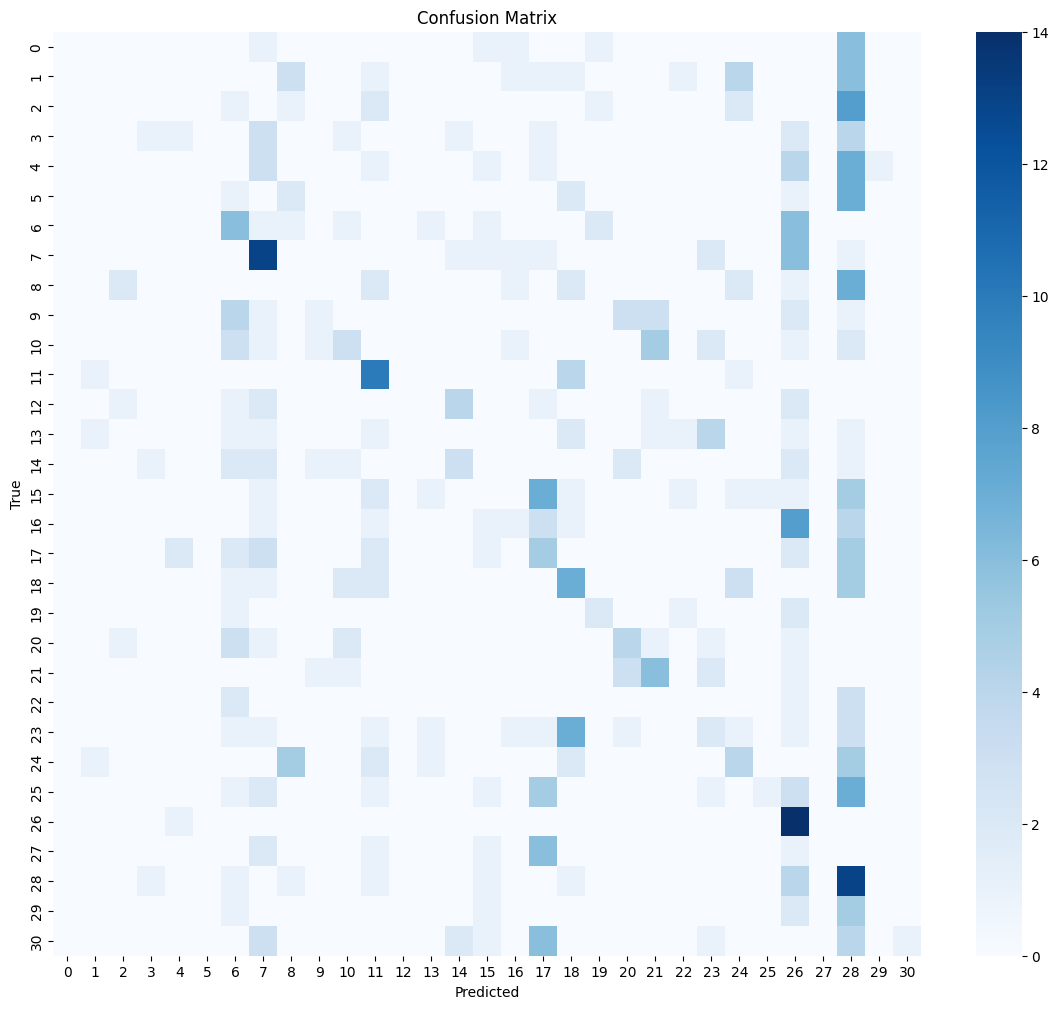

In [19]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(14,12))
sns.heatmap(cm, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.show()


**My discussion and observations:**

In this assignment, the CNN was used as the main component of a face-based biometric authentication system. The idea behind biometric security is that every user has unique physical features (in this case of expriments it is their faces), so the system should be able to tell a legitimate user apart from an imposter just by analyzing their facial patterns.

With the model I used, the CNN learns to extract features from face images, such as the shape of the eyes, nose, chin, etc. After training, the network builds 31 different output classes, each one representing one person from the dataset. In a real authentication system, this prediction step would be used to decide whether the person trying to log in is the “claimed” user or someone else.


However, based on the results from my model, the system would not be reliable enough for an actual biometric security application. Even though the training accuracy improved, the final validation accuracy was only about 19%, and the macro F1 score was low as well. The confusion matrix showed that the model often mixes up certain identities, especially people who look somewhat similar or have fewer training images. This means the system would make a lot of mistakes in real life.

Two main types of biometric errors can happen:
* **False Accept (Security Risk)** : The system incorrectly accepts an imposter as the real user. With low accuracy models, this could happen often, which is dangerous because someone else could get unauthorized access.


* **False Reject (Usability Issue) :** The system rejects the actual user. Since the recall was also low, many legitimate users might get denied access even though they are who they claim to be.

Because of these issues, this CNN is not strong enough to be used as a real biometric login system. In practical systems, much larger datasets and more advanced models (like FaceNet, VGGFace, or deep metric learning systems) are used to get much higher accuracy and reduce both false accepts and false rejects.

